# Reading the CSV and sorting the data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
# df['home_team'].unique()

##### Chosen Teams

Argentina, Brazil, England, France, Germany

In [5]:
teams = ["Argentina", "Brazil", "England", "France", "Germany"]
df = df[["date", "home_team", "away_team", "home_score", "away_score", "tournament"]]


In [6]:
# changing the column to datetime and filtering the data

df["date"] = pd.to_datetime(df["date"])
df = df[(df["date"].dt.year >= 2011) & (df["date"].dt.year <= 2020)]

# Question 1

## (a)

In [7]:
# # Calculate the trend of winning percentage of each selected team by year

result_data = {}
for year in range(2011, 2021):
    for team in teams:
        home_games = df[(df['home_team'] == team) & (df['date'].dt.year == year)]
        away_games = df[(df['away_team'] == team) & (df['date'].dt.year == year)]
        
        
        team_games = pd.concat([home_games, away_games])
        total_games = len(team_games)
        
        total_wins = len(team_games[(team_games['home_team'] == team) & (team_games['home_score'] > team_games['away_score'])]) + \
                     len(team_games[(team_games['away_team'] == team) & (team_games['away_score'] > team_games['home_score'])])
        
        win_percentage = round(total_wins/total_games * 100 if total_games > 0 else 0, 4)
        result_data.setdefault(team, {})[year] = win_percentage


In [8]:
# Summarize the results by team in one table (Table 1a)

table_1a = pd.DataFrame(result_data).T
table_1a['Average Win Percentage'] = table_1a.mean(axis=1)
table_1a.index.name = 'Team'
table_1a.columns.name = 'Year'

print('Winning Percentage by Team by Year')
print()
print(table_1a)

Winning Percentage by Team by Year

Year          2011     2012     2013     2014     2015     2016     2017  \
Team                                                                       
Argentina  42.8571  72.7273  58.3333  66.6667  36.3636  64.2857  50.0000   
Brazil     56.2500  69.2308  68.4211  71.4286  69.2308  63.6364  63.6364   
England    66.6667  53.8462  50.0000  61.5385  70.0000  57.1429  50.0000   
France     53.8462  57.1429  41.6667  66.6667  60.0000  76.4706  63.6364   
Germany    69.2308  57.1429  75.0000  64.7059  55.5556  62.5000  73.3333   

Year          2018     2019   2020  Average Win Percentage  
Team                                                        
Argentina  53.8462  53.3333   75.0                57.34132  
Brazil     86.6667  50.0000  100.0                69.85008  
England    58.8235  70.0000   62.5                60.05178  
France     66.6667  81.8182   75.0                64.29144  
Germany    30.7692  70.0000   37.5                59.57377  


## (b)

In [9]:
# Summarize the results by team in one table (Table 1a)

table_1b = pd.DataFrame(result_data)
table_1b.index.name = 'Year'
table_1b.columns.name = 'Team'

print('Winning Percentage by Year by Team:')
print()
print(table_1b)



Winning Percentage by Year by Team:

Team  Argentina    Brazil  England   France  Germany
Year                                                
2011    42.8571   56.2500  66.6667  53.8462  69.2308
2012    72.7273   69.2308  53.8462  57.1429  57.1429
2013    58.3333   68.4211  50.0000  41.6667  75.0000
2014    66.6667   71.4286  61.5385  66.6667  64.7059
2015    36.3636   69.2308  70.0000  60.0000  55.5556
2016    64.2857   63.6364  57.1429  76.4706  62.5000
2017    50.0000   63.6364  50.0000  63.6364  73.3333
2018    53.8462   86.6667  58.8235  66.6667  30.7692
2019    53.3333   50.0000  70.0000  81.8182  70.0000
2020    75.0000  100.0000  62.5000  75.0000  37.5000


## (c)

In [10]:
table_1b.dtypes

Team
Argentina    float64
Brazil       float64
England      float64
France       float64
Germany      float64
dtype: object

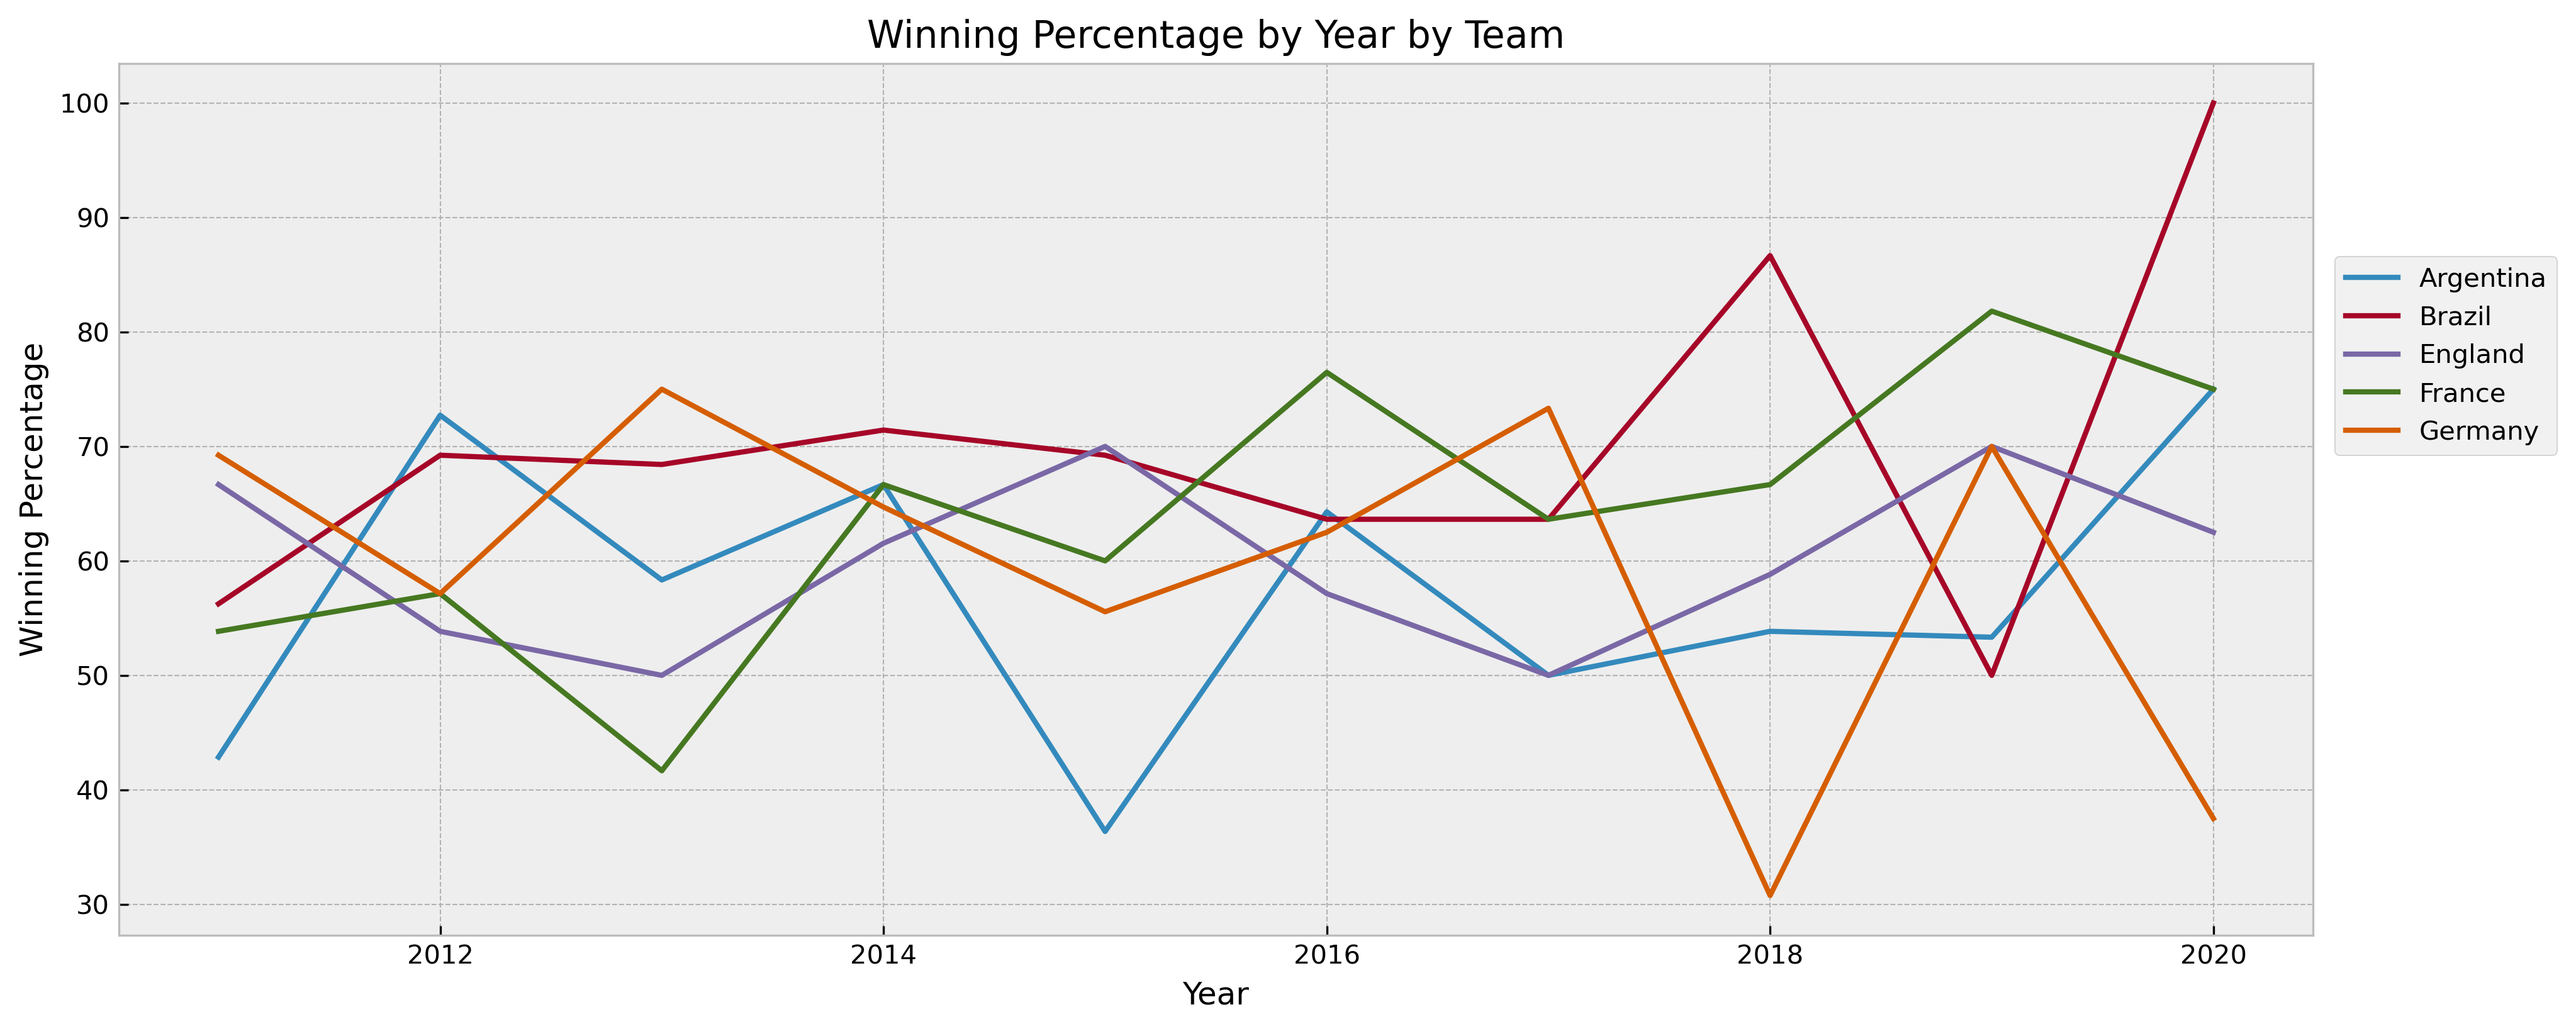

In [12]:
# Visualize the result of Table 1b in one graph


# Use matplotlib's 'classic' style, set figure facecolor to white
plt.style.use('bmh')


import matplotlib.pyplot as plt

plt.figure(figsize = [15,6], dpi = 300)
plt.plot(table_1b)
plt.title("Winning Percentage by Year by Team")
plt.xlabel('Year')
plt.ylabel('Winning Percentage')
plt.legend(table_1b.columns, loc = [1.01, 0.55])
plt.show()


## d) Insights: 

The above graphs and table data give some interesting insights about the winning percentage by team per year. There have been several fluctuations in Argentina's performance over the years just like Germany, except for a sharp increase in 2012. In contrast, Brazil has constantly maintained high winning percentages over the years. England’s performance remained overall stable with some occasional fluctuations. France's overall performance appears to be positive, with notable peaks in 2013 and 2019. 
 Some years, such as 2012 and 2014, show higher overall winning percentages, while others, like 2011 and 2015, demonstrate lower percentages. The year 2020 stands out for some teams with notably high winning percentages, which may be influenced by factors such as match frequency or the quality of opponents faced. 
Overall, all the teams have shown fluctuations whereas, Brazil remains one of the strongest performing sides.

# Question 2

## (a)

In [15]:
# Calculate the average number of goals per match scored by the selected team by year, from 2011 to 2020. 

result_goal = {}
for year in range(2011, 2021):
    for team in teams:
        home_games = df[(df['home_team'] == team) & (df['date'].dt.year == year)]
        away_games = df[(df['away_team'] == team) & (df['date'].dt.year == year)]
        
        
        team_games = pd.concat([home_games, away_games])
        total_games = len(team_games)
        
        total_goals = home_games['home_score'].sum() + away_games['away_score'].sum()
        
        goal_per_game = round(total_goals/total_games if total_games > 0 else 0, 4)
        result_goal.setdefault(team, {})[year] = goal_per_game



In [16]:
# Summarize the results by team by year in one table (Table 2b)

table_2a = pd.DataFrame(result_goal)
table_2a.index.name = "Year"
table_2a.columns.name = "Team"


print('Average Number of Goals per Match by Year by Team:')
print()
print(table_2a)



Average Number of Goals per Match by Year by Team:

Team  Argentina  Brazil  England  France  Germany
Year                                             
2011     1.6667  1.3125   1.6667  1.3077   2.7692
2012     2.3636  2.9231   1.9231  1.5000   2.2857
2013     2.1667  2.5789   2.2500  1.6667   2.9167
2014     1.7333  2.3571   1.7692  2.2667   2.1765
2015     1.2727  1.5385   2.3000  1.7000   2.2222
2016     2.1429  2.5455   1.5000  2.1176   2.1250
2017     1.5000  1.9091   1.4000  2.0909   2.8667
2018     1.8462  1.9333   1.6471  1.7778   1.0769
2019     1.9333  2.0625   3.8000  2.4545   3.3000
2020     1.5000  3.0000   1.6250  2.3750   1.7500


## (b)

In [17]:
# Calculate the correlation result between table 1b and 2a

correlation = table_1b.corrwith(table_2a)
print(correlation)

Team
Argentina    0.513982
Brazil       0.464747
England      0.494667
France       0.794104
Germany      0.909862
dtype: float64


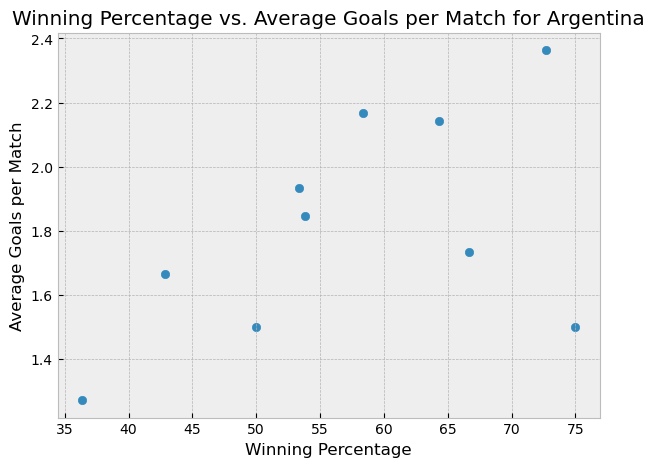

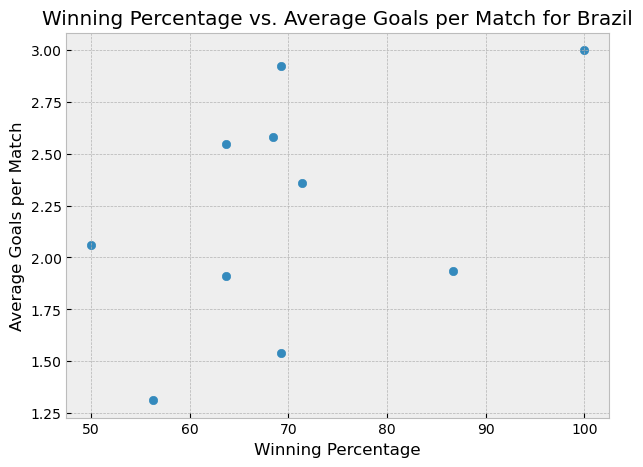

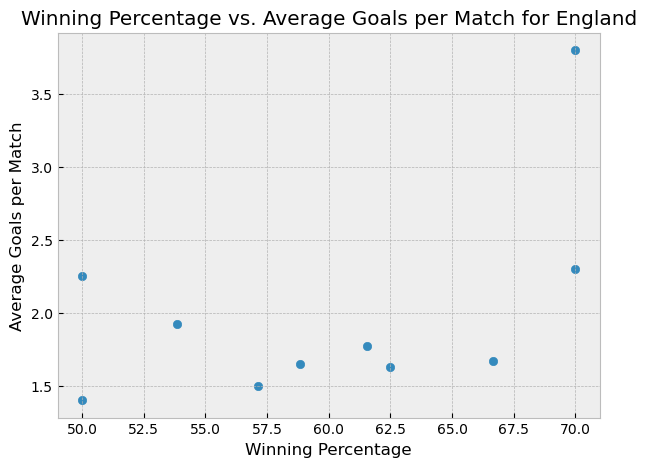

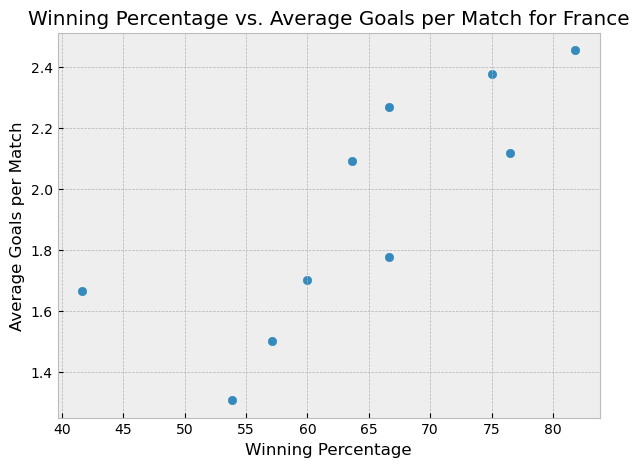

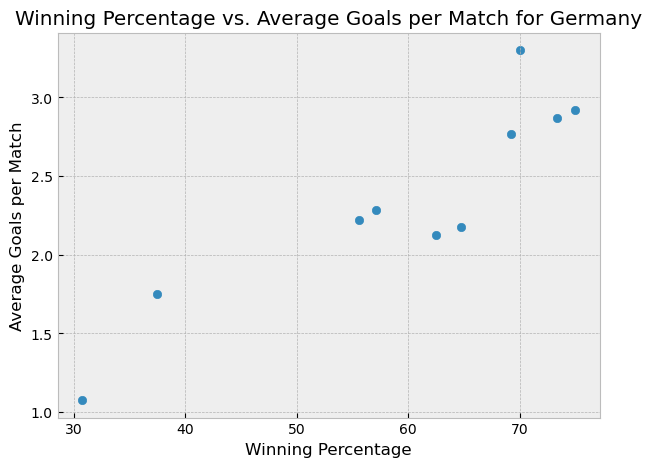

In [18]:
# Plot a scatter diagram between the two variables for each selected team

for team in teams:
    plt.figure(figsize=[7,5])
    plt.scatter(table_1b[team], table_2a[team])
    plt.title(f'Winning Percentage vs. Average Goals per Match for {team}')
    plt.xlabel('Winning Percentage')
    plt.ylabel('Average Goals per Match')
    plt.show()


## (c) Insights - Table_2a

Table_2a in question 2a represents the average number of goals scored per match by year by team. Here, almost all the teams have kept the average number of goals scored per match more than 1 per year with England having the highest number of goals scored in a year (3.80) in 2019. Germany is the most consistence team in scoring goals per matches among all the years. 
In question 2b, we found the correlation between the average number of goals scored per match by year by team and the Winning Percentage by Year by Team. Here, most teams have a lower correlation coefficient in the teams. The correlation results in scatter plot showes that there is a weak positive correlation between winning percentage and average number of goals per match for most teams, indicating that teams that score more goals are more likely to win. However, This may vary as it depends on many factors such as, team strategy, player performance etc. 
In 2b, Germany has a correlation coefficient of 0.909862 which means that as the average number of goals scored per match by year by team increases, the match winning percentage also increases.

## d) Insights - Table_2b

There could be several factors that affects the correlation test done in 2b.

1.Team strategy: Every team has its own playing style and strategy that can impact the relationship between scoring goals and winning matches. For instance, teams that give more importance to their defensive tactics may not rely as much on scoring goals for winning, which could result in a weaker correlation between the two.

2.Player Performance: The correlation between scoring and winning may vary depending on the performance of key players within each team. Teams with star players who consistently score goals may have a higher correlation compared to those that rely more on collective team efforts.

# Question 3

## (a)

In [21]:
prev_two_wins = []
for team in teams:
    team_matches = df[(df['home_team'] == team) | (df['away_team'] == team)]
    for index, row in team_matches.iterrows():
        if (row['home_team'] == team and row['home_score'] > row['away_score']) or (row['away_team'] == team and row['away_score'] > row['home_score']):
            prev_two_wins.append((team, index))

win_count = {team: 0 for team in teams}
for i in range(len(prev_two_wins) - 2):
    if prev_two_wins[i][0] == prev_two_wins[i+1][0] == prev_two_wins[i+2][0]:
        win_count[prev_two_wins[i][0]] += 1

total_matches = len(prev_two_wins) - 2

winning_percentage = {team: (win_count[team] / total_matches) * 100 for team in teams}

print("Winning Percentage for each team when one team won the previous two matches:")
for team in teams:
    print(f"{team}: {winning_percentage[team]:.2f}%")


Winning Percentage for each team when one team won the previous two matches:
Argentina: 17.62%
Brazil: 22.54%
England: 17.36%
France: 20.98%
Germany: 19.43%


# b

In [22]:
prev_one_win = []
for team in teams:
    team_matches = df[(df['home_team'] == team) | (df['away_team'] == team)]
    for index, row in team_matches.iterrows():
        if ((row['home_team'] == team and row['home_score'] > row['away_score']) or 
            (row['away_team'] == team and row['away_score'] > row['home_score'])):
            prev_one_win.append((team, index))

win_count = {team: 0 for team in teams}
for i in range(len(prev_one_win)):
    win_count[prev_one_win[i][0]] += 1

total_matches = len(prev_one_win)

winning_percentage = {team: (win_count[team] / total_matches) * 100 for team in teams}

print("Winning Percentage for each team when one team won one of the previous two matches:")
for team in teams:
    print(f"{team}: {winning_percentage[team]:.2f}%")


Winning Percentage for each team when one team won one of the previous two matches:
Argentina: 18.04%
Brazil: 22.94%
England: 17.78%
France: 21.39%
Germany: 19.85%


# c

In [23]:
prev_two_losses = []
for team in teams:
    team_matches = df[(df['home_team'] == team) | (df['away_team'] == team)]
    for index, row in team_matches.iterrows():
        if ((row['home_team'] == team and row['home_score'] < row['away_score']) or 
            (row['away_team'] == team and row['away_score'] < row['home_score'])):
            prev_two_losses.append((team, index))

win_count = {team: 0 for team in teams}
for i in range(len(prev_two_losses) - 2):
    if prev_two_losses[i][0] == prev_two_losses[i+1][0] == prev_two_losses[i+2][0]:
        win_count[prev_two_losses[i][0]] += 1

total_matches = len(prev_two_losses) - 2

winning_percentage = {team: (win_count[team] / total_matches) * 100 for team in teams}

print("Winning Percentage for each team when one team lost the previous two matches:")
for team in teams:
    print(f"{team}: {winning_percentage[team]:.2f}%")


Winning Percentage for each team when one team lost the previous two matches:
Argentina: 19.79%
Brazil: 14.58%
England: 17.71%
France: 18.75%
Germany: 20.83%


# d) Insight

After analyzing question 3, we have discovered certain winning trends in football matches based on various conditions. If we consider matches where one team won the previous two matches, Brazil has the highest winning percentage at 22.54%, followed closely by France at 20.98%. This suggests that these teams tend to maintain winning streaks after consecutive victories. On the other hand, when one team won one of the previous two matches, Brazil again had the highest winning percentage, indicating consistency in performance regardless of recent results. However, when one team lost the previous two matches, Argentina had the highest winning percentage at 19.79%, suggesting resilience and the ability to bounce back after a couple of losses. Overall, these findings reveal that winning trends exist in football matches, with certain teams demonstrating consistency or resilience under different circumstances. Further analysis could explore additional metrics such as goal differentials, home vs. away performances, or performance against specific opponents to gain deeper insights into winning trends in football.

# Q4 Is there correlation between winning and playing in their hometown (neutral=False in the data)

## (a) Graphical representation of data

In [123]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('results.csv')

In [29]:
print(df.isnull().sum())

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


In [34]:
teams = ["Argentina", "Brazil", "England", "France", "Germany"]
conditions = [
    (df['home_score'] > df['away_score']) & (df['home_team'] == df['country']),  # Home win
    (df['home_score'] < df['away_score']) & (df['home_team'] == df['country']),  # Away win
    (df['home_score'] == df['away_score']) & (df['home_team'] == df['country'])  # Draw
]

choices = ['home_win', 'away_win', 'draw']

df['result'] = np.select(conditions, choices, default=None)


In [35]:
filtered_df = df[df['country'].isin(teams)]

result_counts = filtered_df.groupby(['country', 'result']).size().unstack(fill_value=0)

result_counts['Home winrate %'] = (result_counts['home_win'] / (result_counts['home_win'] + result_counts['draw'] + result_counts['away_win'])) * 100
result_counts['Overall winrate %'] = table_1a['Average Win Percentage']
print("Results of Matches at Home Country")
print(result_counts)


grouped_df = df.groupby(['result']).size().reset_index(name='count')

print()
print("All match results that includes home turf")
print(grouped_df)

Results of Matches at Home Country
result     away_win  draw  home_win  Home winrate %  Overall winrate %
country                                                               
Argentina        31    85       225       65.982405           57.34132
Brazil           23    71       261       73.521127           69.85008
England          64   103       302       64.392324           60.05178
France           96    89       262       58.612975           64.29144
Germany          72    89       272       62.817552           59.57377

All match results that includes home turf
     result  count
0  away_win   8471
1      draw   7527
2  home_win  16400


In [37]:

# Getting games in which the home team is in their home country
home_turf = filtered_df.loc[df['home_team'] == df['country']]


team_scores = home_turf.groupby('home_team').agg({'home_score': 'sum', 'away_score': 'sum'})

# Reset the index to make the team names a column
team_scores = team_scores.reset_index()

print("Total Scores in Home Turf")
print(team_scores)



Total Scores in Home Turf
   home_team  home_score  away_score
0  Argentina         723         259
1     Brazil         903         267
2    England        1125         408
3     France         905         477
4    Germany        1118         453


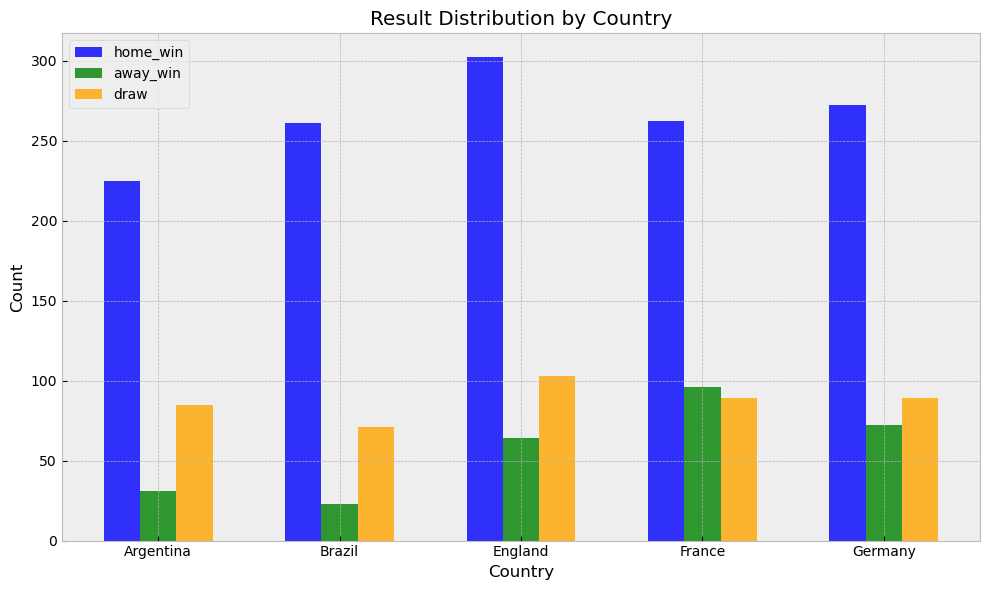

In [38]:

teams = ["Argentina", "Brazil", "England", "France", "Germany"]
colors = ['blue', 'green', 'orange']
result_order = ['home_win', 'away_win', 'draw']  

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
opacity = 0.8
index = np.arange(len(teams))

for i, result in enumerate(result_order):
    result_counts_bar = df[df['result'] == result]['country'].value_counts().reindex(teams, fill_value=0) 
    
    ax.bar(index + (i * bar_width), result_counts_bar, bar_width,
           alpha=opacity, color=colors[i], label=result)

ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Result Distribution by Country')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(teams)
ax.legend()

plt.tight_layout()
plt.show()

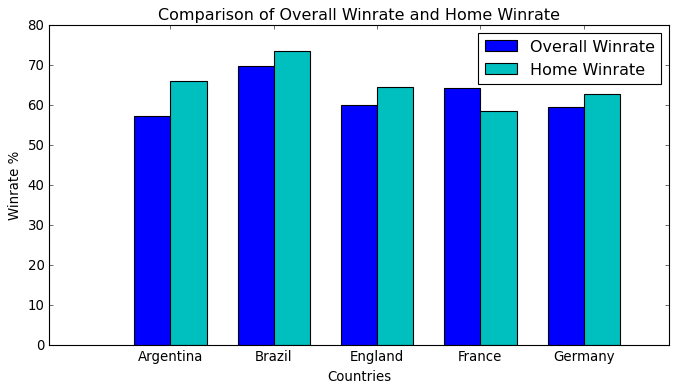

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
countries = teams
overall_winrates = result_counts['Overall winrate %']
home_winrates = result_counts['Home winrate %']

# Set the width of the bars
bar_width = 0.35

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10,5))

# Set the positions of the bars on the x-axis
r1 = np.arange(len(countries))
r2 = [x + bar_width for x in r1]

# Plot the bars for overall winrates and home winrates
ax.bar(r1, overall_winrates, color='b', width=bar_width, label='Overall Winrate')
ax.bar(r2, home_winrates, color='c', width=bar_width, label='Home Winrate')

# Set labels and title
ax.set_xlabel('Countries')
ax.set_ylabel('Winrate %')
ax.set_title('Comparison of Overall Winrate and Home Winrate')
ax.set_xticks([r + bar_width/2 for r in range(len(countries))])
ax.set_xticklabels(countries)

# Add a legend
ax.legend()

# Show the plot
plt.show()

## (b) Descriptive Variability (Boxplot)

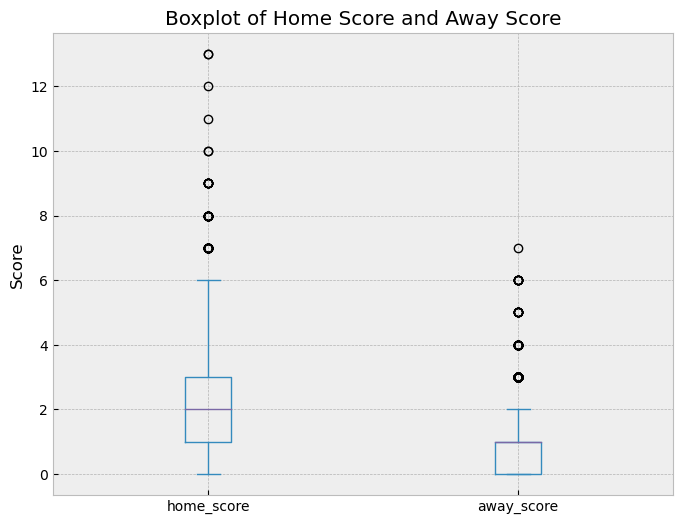

In [39]:
import matplotlib.pyplot as plt

home_turf[['home_score', 'away_score']].plot(kind='box', figsize=(8, 6))
plt.title('Boxplot of Home Score and Away Score')
plt.ylabel('Score')
plt.show()

## (c) Insights and Findings

There is a higher likelihood of a team to win in their home turf, however it is not the only determinant as France seems to have a higher chance to win Overall and not at their Home country.

Additionally, the boxplot can show that the overall the Home Team scores better than the Away_score in the Home Team's Country. Even on the lower quartile of the Home Score is higher than the higher quartile of the away_score.

# Question 5

In [92]:
!pip install fredapi
!pip install fredpy


In [136]:
import pandas as pd
import numpy as np
import fredpy as fp
import matplotlib.pyplot as plt

fp.api_key = '6f71964c32c41b3572013e29a9b4bfb4'

# Use matplotlib's 'classic' style, set figure facecolor to white
plt.style.use('classic')
plt.rcParams.update({'figure.facecolor': 'white'})

In [151]:
# Adding Data

start_date = '2000-01-01'
end_date = '2020-12-31'
win = ['01-01-2000','01-01-2016']


#fredpy

house_fp = fp.series('CSUSHPINSA').window(win).as_frequency(freq='Q')
construction_fp = fp.series('TLRESCONS').window(win)
dff_fp = fp.series('DFF').window(win).as_frequency(freq='Q')
mortgage_fp = fp.series('MORTGAGE30US').window(win).as_frequency(freq='Q')

house_fp, construction_fp, dff_fp, mortgage_fp = fp.window_equalize([house_fp, construction_fp, dff_fp, mortgage_fp])




<Figure size 640x480 with 0 Axes>

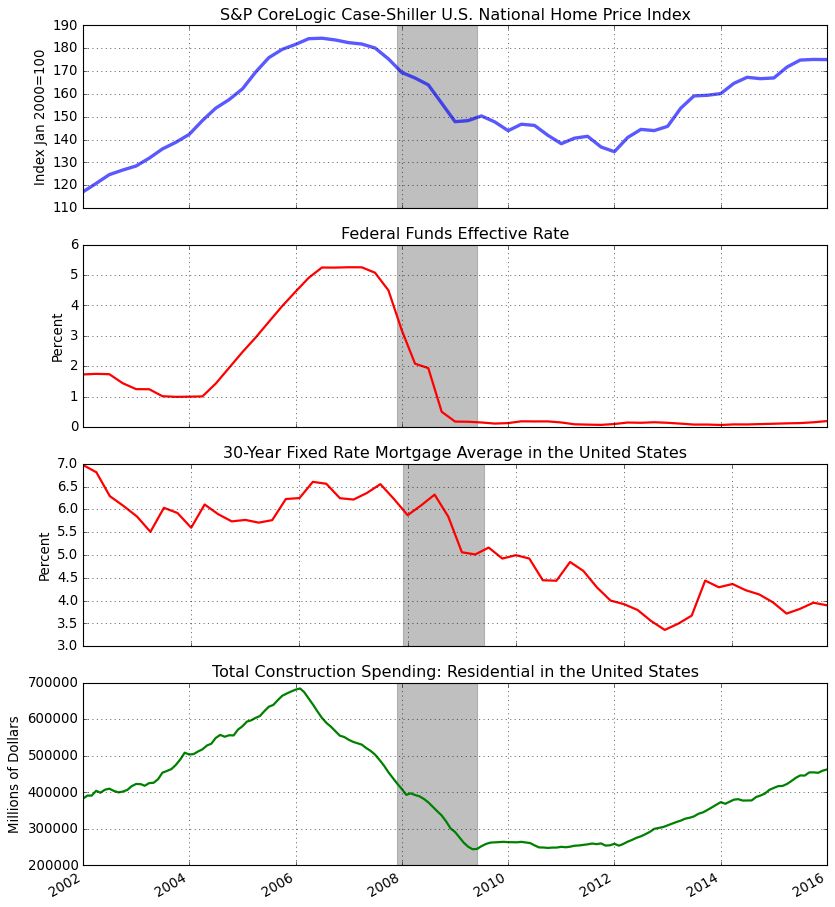

In [152]:


fig = plt.figure()

# Plot
fig = plt.figure(figsize=(12,15))
ax = fig.add_subplot(4,1,1)
ax.plot(house_fp.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(house_fp.title)
ax.set_ylabel(house_fp.units)
house_fp.recessions()

# 

ax = fig.add_subplot(4,1,2)
ax.plot(dff_fp.data,'r-',lw=2)
ax.grid(True)
ax.set_title(dff_fp.title)
ax.set_ylabel(dff_fp.units)
dff_fp.recessions()

#

ax = fig.add_subplot(4,1,3)
ax.plot(mortgage_fp.data,'r-',lw=2)
ax.grid(True)
ax.set_title(mortgage_fp.title)
ax.set_ylabel(mortgage_fp.units)
mortgage_fp.recessions()

#

ax = fig.add_subplot(4,1,4)
ax.plot(construction_fp.data,'g-',lw=2)
ax.grid(True)
ax.set_title(construction_fp.title)
ax.set_ylabel(construction_fp.units)
construction_fp.recessions()

fig.autofmt_xdate()

### Insights

Based on the data I've collected, it is evident that two key indicators for predicting changes in the House Price Index in the United States are Total Construction Spending and the Federal Funds Effective rate.
Total construction spending serves as a significant factor in understanding the level of construction activity in the housing market. It encompasses both the creation of new homes and the renovation of existing ones, both of which can contribute to an increase in property values.
The Federal Funds Effective rate, on the other hand, is closely tied to the 30 Year Mortgage average in the US. When there is a decrease in the fixed-rate mortgage average, it often signals an upcoming decline in home prices across the country.
By considering both Total Construction Spending and the Federal Funds Effective rate, we can gain valuable insights into the potential trends and fluctuations in the House Price Index. This information can be instrumental in making informed decisions related to real estate investment, market analysis, and economic forecasting.